In [498]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [499]:
import os

data_path = "bike_sharing_dataset/"

files = os.listdir(data_path)
print(files)

['SeoulBikeData.csv']


In [500]:
df = pd.read_csv(data_path + "SeoulBikeData.csv", header=None)
print(df.head())
# df.shape

           0                  1     2               3            4   \
0        Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)   
1  01/12/2017                254     0            -5.2           37   
2  01/12/2017                204     1            -5.5           38   
3  01/12/2017                173     2              -6           39   
4  01/12/2017                107     3            -6.2           40   

                 5                 6                         7   \
0  Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)   
1               2.2              2000                     -17.6   
2               0.8              2000                     -17.6   
3                 1              2000                     -17.7   
4               0.9              2000                     -17.6   

                        8             9              10       11           12  \
0  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday Day   
1       

In [501]:
df

0                  1     2               3            4   \
0           Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)   
1     01/12/2017                254     0            -5.2           37   
2     01/12/2017                204     1            -5.5           38   
3     01/12/2017                173     2              -6           39   
4     01/12/2017                107     3            -6.2           40   
...          ...                ...   ...             ...          ...   
8756  30/11/2018               1003    19             4.2           34   
8757  30/11/2018                764    20             3.4           37   
8758  30/11/2018                694    21             2.6           39   
8759  30/11/2018                712    22             2.1           41   
8760  30/11/2018                584    23             1.9           43   

                    5                 6                         7   \
0     Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)   
1                  2.2              2000                     -17.6   
2                  0.8              2000                     -17.6   
3                    1              2000                     -17.7   
4                  0.9              2000                     -17.6   
...                ...               ...                       ...   
8756               2.6              1894                     -10.3   
8757               2.3              2000                      -9.9   
8758               0.3              1968                      -9.9   
8759                 1              1859                      -9.8   
8760               1.3              1909                      -9.3   

                           8             9              10       11  \
0     Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons   
1                           0             0              0   Winter   
2                           0             0              0   Winter   
3                           0             0              0   Winter   
4                           0             0              0   Winter   
...                       ...           ...            ...      ...   
8756                        0             0              0   Autumn   
8757                        0             0              0   Autumn   
8758                        0             0              0   Autumn   
8759                        0             0              0   Autumn   
8760                        0             0              0   Autumn   

               12               13  
0     Holiday Day  Functioning Day  
1      No Holiday              Yes  
2      No Holiday              Yes  
3      No Holiday              Yes  
4      No Holiday              Yes  
...           ...              ...  
8756   No Holiday              Yes  
8757   No Holiday              Yes  
8758   No Holiday              Yes  
8759   No Holiday              Yes  
8760   No Holiday              Yes  

[8761 rows x 14 columns]

In [502]:
# Transform the data
df.columns = df.iloc[0]
df = df.drop(df.index[0])

In [503]:
df = df[df['Functioning Day'] != 'No']
df = df.drop(columns=['Functioning Day'])

In [504]:
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y') 
df['Date']

1      2017-12-01
2      2017-12-01
3      2017-12-01
4      2017-12-01
5      2017-12-01
          ...    
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
8760   2018-11-30
Name: Date, Length: 8465, dtype: datetime64[ns]

In [505]:
df

0          Date Rented Bike Count Hour Temperature(C) Humidity(%)  \
1    2017-12-01               254    0           -5.2          37   
2    2017-12-01               204    1           -5.5          38   
3    2017-12-01               173    2             -6          39   
4    2017-12-01               107    3           -6.2          40   
5    2017-12-01                78    4             -6          36   
...         ...               ...  ...            ...         ...   
8756 2018-11-30              1003   19            4.2          34   
8757 2018-11-30               764   20            3.4          37   
8758 2018-11-30               694   21            2.6          39   
8759 2018-11-30               712   22            2.1          41   
8760 2018-11-30               584   23            1.9          43   

0    Wind speed (m/s) Visibility (10m) Dew point temperature(C)  \
1                 2.2             2000                    -17.6   
2                 0.8             2000                    -17.6   
3                   1             2000                    -17.7   
4                 0.9             2000                    -17.6   
5                 2.3             2000                    -18.6   
...               ...              ...                      ...   
8756              2.6             1894                    -10.3   
8757              2.3             2000                     -9.9   
8758              0.3             1968                     -9.9   
8759                1             1859                     -9.8   
8760              1.3             1909                     -9.3   

0    Solar Radiation (MJ/m2) Rainfall(mm) Snowfall (cm) Seasons Holiday Day  
1                          0            0             0  Winter  No Holiday  
2                          0            0             0  Winter  No Holiday  
3                          0            0             0  Winter  No Holiday  
4                          0            0             0  Winter  No Holiday  
5                          0            0             0  Winter  No Holiday  
...                      ...          ...           ...     ...         ...  
8756                       0            0             0  Autumn  No Holiday  
8757                       0            0             0  Autumn  No Holiday  
8758                       0            0             0  Autumn  No Holiday  
8759                       0            0             0  Autumn  No Holiday  
8760                       0            0             0  Autumn  No Holiday  

[8465 rows x 13 columns]

In [506]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df = df.drop(columns=['Date'])

In [507]:
df['Seasons'] = df['Seasons'].replace({'Winter': 0, 'Autumn': 1, 'Spring': 2, 'Summer': 3})
df['Holiday Day'] = df['Holiday Day'].replace({'No Holiday': 0, 'Holiday': 1})

In [508]:
df

0    Rented Bike Count Hour Temperature(C) Humidity(%) Wind speed (m/s)  \
1                  254    0           -5.2          37              2.2   
2                  204    1           -5.5          38              0.8   
3                  173    2             -6          39                1   
4                  107    3           -6.2          40              0.9   
5                   78    4             -6          36              2.3   
...                ...  ...            ...         ...              ...   
8756              1003   19            4.2          34              2.6   
8757               764   20            3.4          37              2.3   
8758               694   21            2.6          39              0.3   
8759               712   22            2.1          41                1   
8760               584   23            1.9          43              1.3   

0    Visibility (10m) Dew point temperature(C) Solar Radiation (MJ/m2)  \
1                2000                    -17.6                       0   
2                2000                    -17.6                       0   
3                2000                    -17.7                       0   
4                2000                    -17.6                       0   
5                2000                    -18.6                       0   
...               ...                      ...                     ...   
8756             1894                    -10.3                       0   
8757             2000                     -9.9                       0   
8758             1968                     -9.9                       0   
8759             1859                     -9.8                       0   
8760             1909                     -9.3                       0   

0    Rainfall(mm) Snowfall (cm)  Seasons  Holiday Day  Day  Month  Year  
1               0             0        0            0    1     12  2017  
2               0             0        0            0    1     12  2017  
3               0             0        0            0    1     12  2017  
4               0             0        0            0    1     12  2017  
5               0             0        0            0    1     12  2017  
...           ...           ...      ...          ...  ...    ...   ...  
8756            0             0        1            0   30     11  2018  
8757            0             0        1            0   30     11  2018  
8758            0             0        1            0   30     11  2018  
8759            0             0        1            0   30     11  2018  
8760            0             0        1            0   30     11  2018  

[8465 rows x 15 columns]

In [509]:
# df['Seasons'] = df['Seasons'].replace({'Winter': 1, 'Autumn': 2, 'Spring': 3, 'Summer': 4})
# df['Holiday Day'] = df['Holiday Day'].replace({'No Holiday': 0, 'Holiday': 1})
# df['Functioning Day'] = df['Functioning Day'].replace({'No': 0, 'Yes': 1})

In [510]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

0    Rented Bike Count Hour Temperature(C) Humidity(%) Wind speed (m/s)  \
1                  254    0           -5.2          37              2.2   
2                  204    1           -5.5          38              0.8   
3                  173    2             -6          39                1   
4                  107    3           -6.2          40              0.9   
5                   78    4             -6          36              2.3   
6                  100    5           -6.4          37              1.5   
7                  181    6           -6.6          35              1.3   
8                  460    7           -7.4          38              0.9   
9                  930    8           -7.6          37              1.1   
10                 490    9           -6.5          27              0.5   
11                 339   10           -3.5          24              1.2   
12                 360   11           -0.5          21              1.3   
13                 449   

In [511]:
df

0    Rented Bike Count Hour Temperature(C) Humidity(%) Wind speed (m/s)  \
1                  254    0           -5.2          37              2.2   
2                  204    1           -5.5          38              0.8   
3                  173    2             -6          39                1   
4                  107    3           -6.2          40              0.9   
5                   78    4             -6          36              2.3   
...                ...  ...            ...         ...              ...   
8756              1003   19            4.2          34              2.6   
8757               764   20            3.4          37              2.3   
8758               694   21            2.6          39              0.3   
8759               712   22            2.1          41                1   
8760               584   23            1.9          43              1.3   

0    Visibility (10m) Dew point temperature(C) Solar Radiation (MJ/m2)  \
1                2000                    -17.6                       0   
2                2000                    -17.6                       0   
3                2000                    -17.7                       0   
4                2000                    -17.6                       0   
5                2000                    -18.6                       0   
...               ...                      ...                     ...   
8756             1894                    -10.3                       0   
8757             2000                     -9.9                       0   
8758             1968                     -9.9                       0   
8759             1859                     -9.8                       0   
8760             1909                     -9.3                       0   

0    Rainfall(mm) Snowfall (cm)  Seasons  Holiday Day  Day  Month  Year  
1               0             0        0            0    1     12  2017  
2               0             0        0            0    1     12  2017  
3               0             0        0            0    1     12  2017  
4               0             0        0            0    1     12  2017  
5               0             0        0            0    1     12  2017  
...           ...           ...      ...          ...  ...    ...   ...  
8756            0             0        1            0   30     11  2018  
8757            0             0        1            0   30     11  2018  
8758            0             0        1            0   30     11  2018  
8759            0             0        1            0   30     11  2018  
8760            0             0        1            0   30     11  2018  

[8465 rows x 15 columns]

In [512]:
X = df.astype(float)
y = X.pop('Rented Bike Count')

# Standardize the features
X -= X.mean()
X /= X.std()

N, D = X.shape

In [513]:
df

0    Rented Bike Count Hour Temperature(C) Humidity(%) Wind speed (m/s)  \
1                  254    0           -5.2          37              2.2   
2                  204    1           -5.5          38              0.8   
3                  173    2             -6          39                1   
4                  107    3           -6.2          40              0.9   
5                   78    4             -6          36              2.3   
...                ...  ...            ...         ...              ...   
8756              1003   19            4.2          34              2.6   
8757               764   20            3.4          37              2.3   
8758               694   21            2.6          39              0.3   
8759               712   22            2.1          41                1   
8760               584   23            1.9          43              1.3   

0    Visibility (10m) Dew point temperature(C) Solar Radiation (MJ/m2)  \
1                2000                    -17.6                       0   
2                2000                    -17.6                       0   
3                2000                    -17.7                       0   
4                2000                    -17.6                       0   
5                2000                    -18.6                       0   
...               ...                      ...                     ...   
8756             1894                    -10.3                       0   
8757             2000                     -9.9                       0   
8758             1968                     -9.9                       0   
8759             1859                     -9.8                       0   
8760             1909                     -9.3                       0   

0    Rainfall(mm) Snowfall (cm)  Seasons  Holiday Day  Day  Month  Year  
1               0             0        0            0    1     12  2017  
2               0             0        0            0    1     12  2017  
3               0             0        0            0    1     12  2017  
4               0             0        0            0    1     12  2017  
5               0             0        0            0    1     12  2017  
...           ...           ...      ...          ...  ...    ...   ...  
8756            0             0        1            0   30     11  2018  
8757            0             0        1            0   30     11  2018  
8758            0             0        1            0   30     11  2018  
8759            0             0        1            0   30     11  2018  
8760            0             0        1            0   30     11  2018  

[8465 rows x 15 columns]

In [514]:
D0 = int(D / 2)

In [530]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     display(df)

0    Rented Bike Count Hour Temperature(C) Humidity(%) Wind speed (m/s)  \
1                  254    0           -5.2          37              2.2   
2                  204    1           -5.5          38              0.8   
3                  173    2             -6          39                1   
4                  107    3           -6.2          40              0.9   
5                   78    4             -6          36              2.3   
6                  100    5           -6.4          37              1.5   
7                  181    6           -6.6          35              1.3   
8                  460    7           -7.4          38              0.9   
9                  930    8           -7.6          37              1.1   
10                 490    9           -6.5          27              0.5   
11                 339   10           -3.5          24              1.2   
12                 360   11           -0.5          21              1.3   
13                 449   12            1.7          23              1.4   
14                 451   13            2.4          25              1.6   
15                 447   14              3          26                2   
16                 463   15            2.1          36              3.2   
17                 484   16            1.2          54              4.2   
18                 555   17            0.8          58              1.6   
19                 862   18            0.6          66              1.4   
20                 600   19              0          77              1.7   
21                 426   20           -0.3          79              1.5   
22                 405   21           -0.8          81              0.8   
23                 398   22           -0.9          83              1.5   
24                 323   23           -1.3          84                1   
25                 328    0           -1.8          87              1.1   
26                 308    1           -2.2          86              0.6   
27                 262    2           -2.9          86              1.5   
28                 167    3           -3.5          81              2.2   
29                  89    4           -3.8          79                2   
30                  79    5             -4          79              1.5   
31                  70    6           -4.3          82              2.1   
32                 146    7           -4.4          81              2.5   
33                 219    8           -4.2          79              2.1   
34                 328    9           -2.9          68              1.6   
35                 334   10           -0.4          57              1.6   
36                 388   11            1.9          49              1.8   
37                 479   12            4.3          41              1.3   
38                 606   13              6          36              1.8   
39                 611   14            7.3          35              1.3   
40                 589   15            7.6          41              2.3   
41                 618   16            6.4          48              2.6   
42                 572   17              6          51              2.5   
43                 489   18            5.5          53              1.5   
44                 385   19              5          52              2.3   
45                 359   20            4.6          51              1.2   
46                 377   21            4.1          55              1.2   
47                 354   22            3.5          54              1.5   
48                 366   23              4          56                1   
49                 342    0              4          58              1.4   
50                 227    1            3.9          69              1.7   
51                 228    2            3.3          79              1.4   
52                 117    3            3.4          71              1.6   
53                  76   

Trying to find distribution of values for estimated parameters

In [515]:
predictors = X.columns.values
coords = {"predictors": predictors}
with pm.Model(coords=coords) as model:
    # Priors for unknown model parameters
    sigma = pm.HalfNormal('sigma', sigma=20) # sd of the error term and sigma cannot be negative
    alpha = pm.Normal('alpha', mu=0, sigma=20) 
    # coefficients for each predictor
    beta = pm.Normal('beta', mu=0, sigma=20, dims='predictors') 
    
    # Expected value: lin comb of coeffs and predictors
    mu = pm.math.dot(beta, X.T) + alpha 
    
    # Likelihood (sampling distribution) of observations
    likelihood = pm.Normal('y', mu, sigma, observed=y)

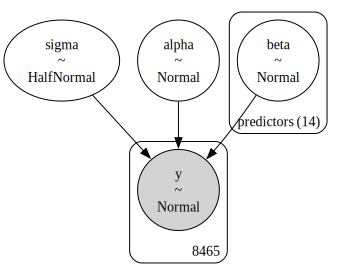

In [516]:
pm.model_to_graphviz(model)

In [517]:
with model:
    idata = pm.sample(1000, random_seed=42, progressbar=True, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.


In [518]:
az.summary(idata, round_to=2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  \
alpha                           691.15   4.69  682.28   699.67       0.06   
beta[Hour]                      196.17   5.03  186.78   205.56       0.06   
beta[Temperature(C)]            197.79  13.04  173.34   222.61       0.19   
beta[Humidity(%)]              -178.46   8.60 -194.55  -162.86       0.13   
beta[Wind speed (m/s)]           16.66   5.21    6.86    26.39       0.06   
beta[Visibility (10m)]           12.05   5.68    1.12    22.47       0.07   
beta[Dew point temperature(C)]  100.97  14.33   74.35   128.55       0.21   
beta[Solar Radiation (MJ/m2)]   -39.51   5.96  -50.83   -28.10       0.08   
beta[Rainfall(mm)]              -69.33   4.67  -78.35   -60.76       0.05   
beta[Snowfall (cm)]               2.31   4.87   -6.63    11.61       0.06   
beta[Seasons]                    36.52   7.92   21.77    51.44       0.09   
beta[Holiday Day]               -25.36   4.58  -34.09   -16.95       0.05   
beta[Day]                        -3.02   4.55  -11.35     5.64       0.05   
beta[Month]                     103.45   6.12   91.19   114.28       0.09   
beta[Year]                       82.88   6.36   70.52    94.59       0.08   
sigma                           431.63   3.24  425.41   437.61       0.04   

                                mcse_sd  ess_bulk  ess_tail  r_hat  
alpha                              0.04   7033.07   2756.52    1.0  
beta[Hour]                         0.04   7026.28   2924.10    1.0  
beta[Temperature(C)]               0.13   4844.99   3194.21    1.0  
beta[Humidity(%)]                  0.09   4420.58   3169.37    1.0  
beta[Wind speed (m/s)]             0.05   7969.61   2957.09    1.0  
beta[Visibility (10m)]             0.05   6369.45   3327.46    1.0  
beta[Dew point temperature(C)]     0.15   4873.59   2970.28    1.0  
beta[Solar Radiation (MJ/m2)]      0.06   5727.09   2642.57    1.0  
beta[Rainfall(mm)]                 0.04   7741.41   2778.90    1.0  
beta[Snowfall (cm)]                0.07   6630.44   2770.99    1.0  
beta[Seasons]                      0.07   7131.00   2883.17    1.0  
beta[Holiday Day]                  0.04   8978.69   3209.03    1.0  
beta[Day]                          0.07   7577.01   2929.75    1.0  
beta[Month]                        0.06   4899.78   3307.45    1.0  
beta[Year]                         0.06   5714.23   2876.05    1.0  
sigma                              0.03   7355.68   2401.68    1.0

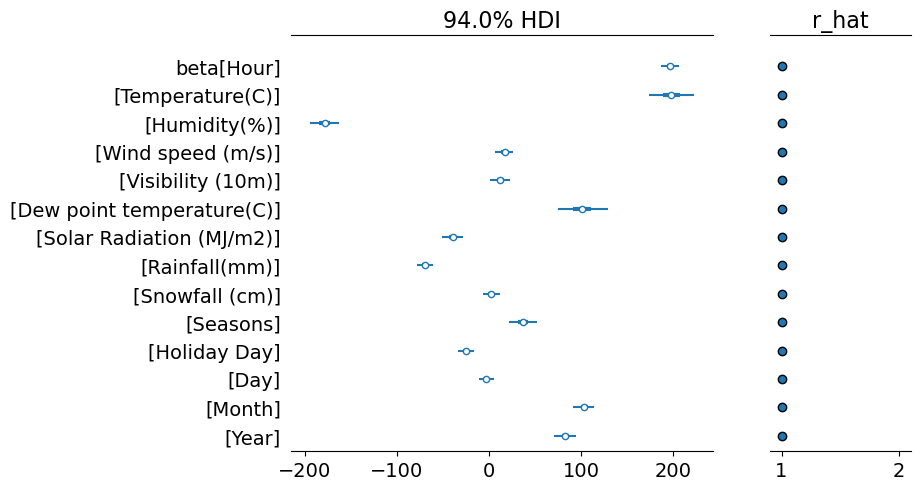

In [521]:
az.plot_forest(idata, var_names=['beta'], combined=True, r_hat=True);